# Análisis de datos y estadísticas

#### Importación de módulos a utilziar

In [109]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import time
from collections import Counter

#### Apertura del archivo a procesar

In [220]:
csv = "informacion_partidas.csv"
path = os.path.join(os.getcwd(),'..','csv',csv)

try:
    df=pd.read_csv(path)

except FileNotFoundError:
    print(f"No se encuentra el dataset a procesar {csv}")

#### Top 10 de palabras que se encuentran primero de todas las partidas

#### Módulo para gráficos de torta

In [19]:
def make_pie_chart(data: pd.Series, labels: list, title:str) -> plt.pie:
    """
    funcion 'make_pie_chart'

    Def:
        Dados ciertos parámetros, devuelve un gráfico de tortas con sus respectivas proporciones, leyendas, porcentajes y título.
    Args:
        data (pd.Series): contiene una Serie a la que se le aplicó el criterio .groupby.size()
        labels (list): es una lista que contiene las claves del parámetro 'data'
        title (str): es una cadena que será el título del gráfico
    """
    plt.pie(data, autopct='%1.1f%%', shadow=True)
    plt.legend(labels)
    plt.title(title)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

#### Gráfico que muestre el porcentaje de partidas por estado.

In [ ]:
# uso de matplotlib e informacion_partidas.csv//columna[2] "Estado"

#ok, finalizada, error, -, timeout, cancelada, partidas sin evento fin

estado = df[(df["Estado"] != "ok") & (df["Estado"] != "-")]
estado = estado.groupby(["Estado"]).size()
etiquetas = [x for x in estado.keys()]
make_pie_chart(estado, etiquetas, "Partidas por estado")


#### Gráfico que muestre el porcentaje de partidas finalizadas según género

In [ ]:
# uso de matplotlib e informacion_partidas.csv//columna[8] "Genero"
#mismo procesamiento que gráfico anterior, cambia columna

genero = df[df["Estado"] == "finalizada"]
genero = genero.groupby(["Genero"]).size()
etiquetas = [x for x in genero.keys()]
make_pie_chart(genero, etiquetas, "Partidas finalizadas por género")

#### Gráfico que muestre el porcentaje de partidas finalizadas según dataset.

In [ ]:
# uso de matplotlib e informacion_partidas.csv//columna[9] "Dataset"

dataset = df[df["Estado"] == "finalizada"]
dataset = dataset.groupby(["Dataset"]).size()
etiquetas = [x for x in dataset.keys()]
make_pie_chart(dataset, etiquetas, "Partidas finalizadas por dataset")

#### Gráfico que muestre el procentaje de partidas finalizadas según nivel

In [ ]:
# uso de matplotlib e informacion_partidas.csv//columna[7] "Nivel"
#mismo procesamiento que gráfico anterior, cambia columna

dificultad = df[df["Estado"] == "finalizada"]
dificultad = dificultad.groupby(["Nivel"]).size()
etiquetas = [x for x in dificultad.keys()]
make_pie_chart (dificultad, etiquetas, "Partidas finalizadas por nivel")

#### Duración total de la partida

In [ ]:
# no estaría entendiendo si acá deberíamos implementar un gráfico, una suma total de todas las duraciones o cómo hacer este procesamiento.

#### Tiempo de la respuesta exitosa más rápida

In [221]:
# debería el informar máximo de (timestamp de estado "OK" - timestamp de registro anterior) 
minimo=999999999999
for i in range(len(df)):
    if(df.iloc[i].Estado=='ok'):
        tiempo=df.iloc[i].Timestamp-df.iloc[i-1].Timestamp
        minimo=tiempo if tiempo<minimo else minimo 
print (f"El tiempo de respuesta exitosa más rápida es: {minimo}s")       

El tiempo de respuesta exitosa más rápida es: 1s


#### Promedio de tiempo de respuesta para respuestas exitosas

In [223]:

tiempos=[]
for i in range(len(df)):
    if(df.iloc[i].Estado=='ok'):
        tiempo=df.iloc[i].Timestamp-df.iloc[i-1].Timestamp
        tiempos.append(tiempo)
promedio=sum(tiempos)/len(tiempos)

print (f"El tiempo promedio de respuesta exitosa es: {promedio:.2f}s") 

El tiempo promedio de respuesta exitosa es: 4.06s


#### Promedio de tiempo de partida general

In [ ]:
# variable que suma (timestamp(estado inicio_partida) - timestamp(estado fin)) y divide por cant de partidas [sobre esto último deberíamos consultar si se considerará también las canceladas]

#### Módulo para gráficos de barras

In [114]:
def make_bar_chart(valores_x:list,valores_y:list, title,y_label,x_label:str):
    """
    funcion 'make_bar_chart'

    Def:
        Dados ciertos parámetros, devuelve un gráfico de barras con sus respectivas proporciones, leyendas, porcentajes y título.
    Args:
        valores_x(list): son los valores que van en el eje x del gráfico
        valores_y(list): son los valores que van en el eje y del gráfico
        title (str): es una cadena que será el título del gráfico
        y_label(str): es la etiqueta de los valores del eje y 
        x_label(str): es la etiqueta de los valores del eje x
        range(int): valor maximo para el eje y
    """
    
    def agregar_valores(valores:list):
        """
        Def:
            Le agrega al gráfico los valores de las barras
        Args:
            valores(list): lista de los valores
        """
        for i in range(len(valores)):
            #plt.text recibe x,y,s. En la cordenada (x,y) agrega el valor s
            plt.text(i,valores[i],valores[i],ha='center')

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    agregar_valores(valores_y)
    plt.bar(valores_x,valores_y)

#### Porcentaje de aciertos por usuarie

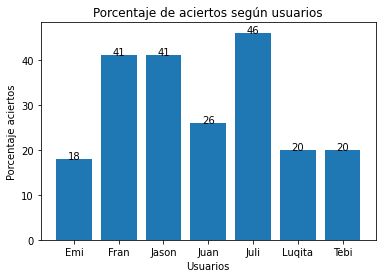

In [207]:
aciertos= df[df["Estado"] == "ok"]
aciertos_usuarios=aciertos.groupby(["Usuarie"]).size()
rta_total=df[(df["Estado"] == "ok")|(df["Estado"] == "error")|(df["Estado"] == "timeout")]
rta_totales_usuarios=rta_total.groupby(["Usuarie"]).size().values

usuarios=aciertos_usuarios.keys()
porcentajes=[int((rta_ok/rta_total)*100) for rta_ok,rta_total in zip(aciertos_usuarios.values,rta_totales_usuarios)]

make_bar_chart(usuarios,porcentajes,'Porcentaje de aciertos según usuarios','Porcentaje aciertos','Usuarios')

#### Cantidad de tarjetas para las que el usuarie no dio respuesta

In [ ]:
sin_respuesta = df[df["Estado"] == "timeout"]
sin_respuesta=sin_respuesta.groupby(["Usuarie"]).size()

usuarios = [x for x in sin_respuesta.keys()]
sin_respuesta_por_usuarios = [x for x in sin_respuesta.values]
make_bar_chart(usuarios,sin_respuesta_por_usuarios,'Tarjetas sin respuesta por usuario','Cantidad tarjetas','Usuarios')

#### Cantidad de tarjetas en las que el usuarie dio una respuesta errónea

In [ ]:
errores = df[df["Estado"] == "error"]
errores = errores.groupby(["Usuarie"]).size()

usuarios = [x for x in errores.keys()]
errores_por_usuario = [x for x in errores.values]
make_bar_chart(usuarios,errores_por_usuario,'Tarjetas con respuesta errónea por usuario','Cantidad tarjetas','Usuarios')

### Opcional

#### Gráfico que muestre el porcentaje de partidas que se juegan para cada dia de la semana

#### Promedio de tiempo de partidas finalizadas por nivel

#### Porcentaje de palabras encontradas en las partidas "timeout"